In [12]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm
%matplotlib inline

In [317]:
student_placement = pd.read_csv('Placement_Data_Full_Class.csv')

In [318]:
student_placement.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [319]:
student_placement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [320]:
student_placement.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [321]:
student_placement.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [358]:
## ag sr_no = Serial Number, ssc_p = Secondary Education percentage, ssc_b = Board of Education- Central/ Others
##hsc_p = Higher Secondary Education percentage- 12th Grade,hsc_b = Board of Education- Central/ Others
##Degree Percentage,Under Graduation(Degree type)- Field of degree education, Work experience, 
##etest = employability test percentage, specialistation = post graduation (MBA) specialisation,
##status = status of placement


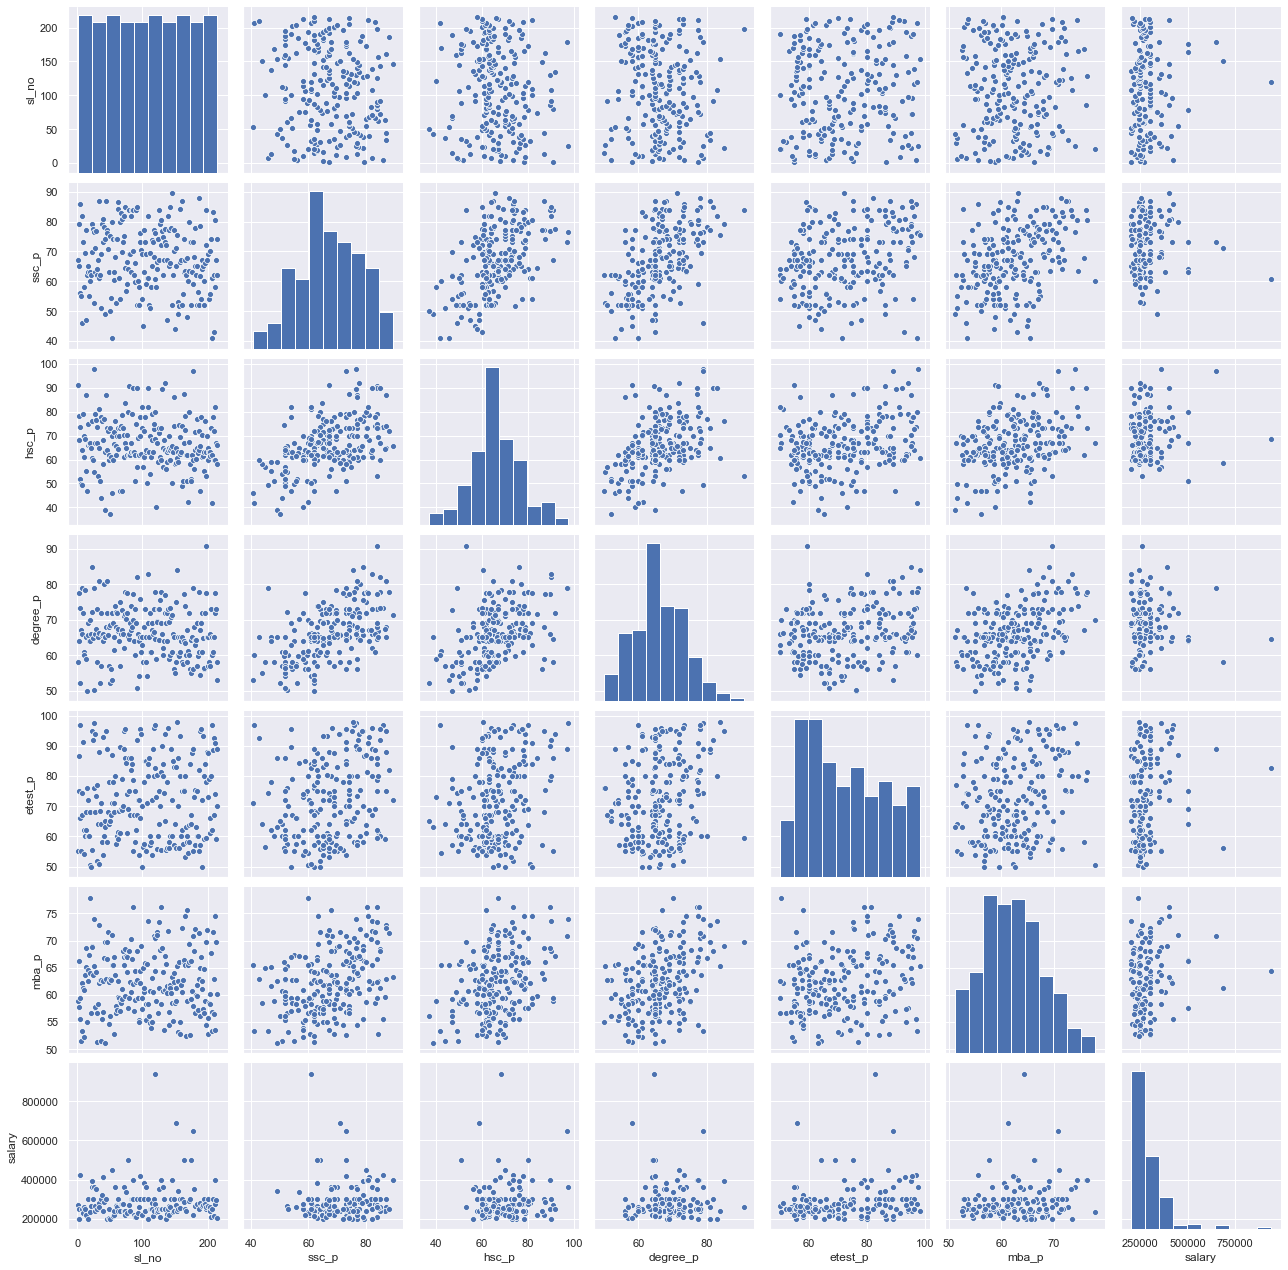

In [323]:
sns.pairplot(student_placement)

In [324]:
df_gender = pd.DataFrame(student_placement['gender'])
df_gender

,gender
0,M
1,M
2,M
3,M
4,M
...,...
210,M
211,M
212,M
213,F


In [325]:
# one hot encoding

In [326]:
genders = pd.get_dummies(df_gender)
genders

,gender_F,gender_M
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
210,0,1
211,0,1
212,0,1
213,1,0


We only need 1 of the 2 dummy variables to represent the original categorical variable Sex.

Any of the 2 will suffice, and it doesn't matter which one we select, since they are equivalent.

Therefore, to encode a categorical variable with 2 labels, we need 1 dummy variable.

we need k-1 dummy variables.

In [346]:
x = pd.get_dummies(df_gender, drop_first=True)
df_status = pd.DataFrame(student_placement['status'])
status_endoncing = pd.get_dummies(df_status,drop_first=True)

In [341]:
df1 = student_placement.assign(gender=x,status=status_endoncing, salary=df['salary'].fillna(0))
df1

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,1,270000.0
1,2,1,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,1,200000.0
2,3,1,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,1,250000.0
3,4,1,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,0,0.0
4,5,1,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,1,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,1,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,1,400000.0
211,212,1,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,1,275000.0
212,213,1,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,1,295000.0
213,214,0,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,1,204000.0


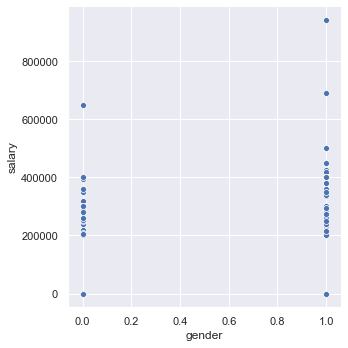

In [332]:
sns.relplot(x='gender',y='salary',data=df1)

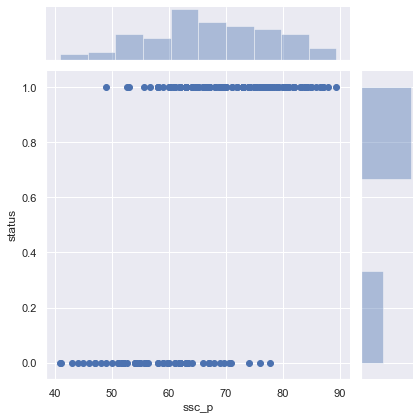

In [343]:

sns.jointplot(x='ssc_p',y='status',data=df1,kind='scatter')

## Demanded Degree specialization

In [349]:
student_placement['degree_t'].unique()

array(['Sci&Tech', 'Comm&Mgmt', 'Others'], dtype=object)

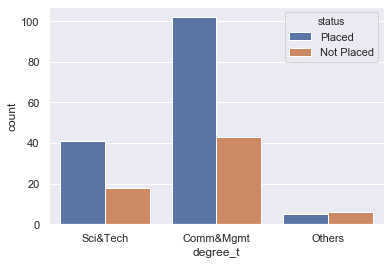

In [348]:
sns.set(style="darkgrid")
sns.countplot(x = 'degree_t' , hue = 'status' , data = student_placement)

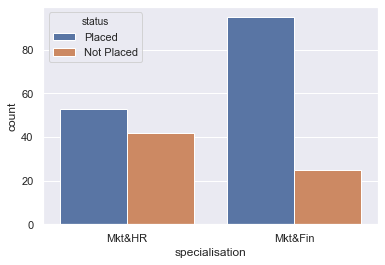

In [350]:
sns.set(style="darkgrid")
sns.countplot(x = 'specialisation' , hue = 'status' , data = student_placement)

## Occurrences for each categorie

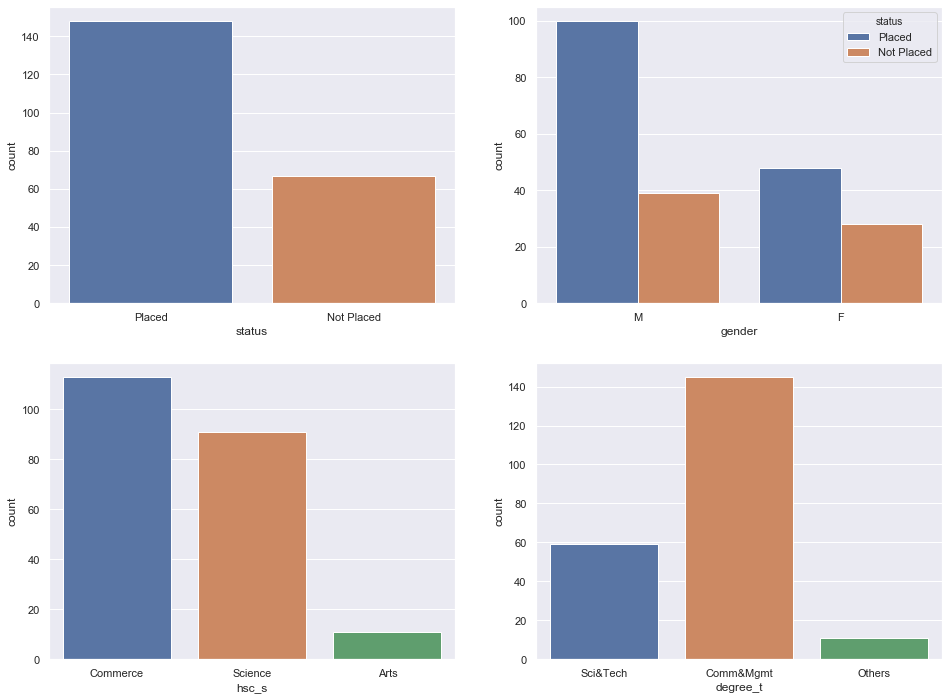

In [337]:
fig,axes = plt.subplots(2,2,figsize=(16,12))

sns.countplot(x = 'status', data = student_placement, ax=axes[0,0])
sns.countplot(x = 'gender' , hue = 'status' , data = student_placement,ax=axes[0,1])
sns.countplot(x = 'hsc_s', data = student_placement, ax=axes[1,0])
sns.countplot(x = 'degree_t', data = student_placement, ax=axes[1,1])

## Does percentage matters for one to get placed?

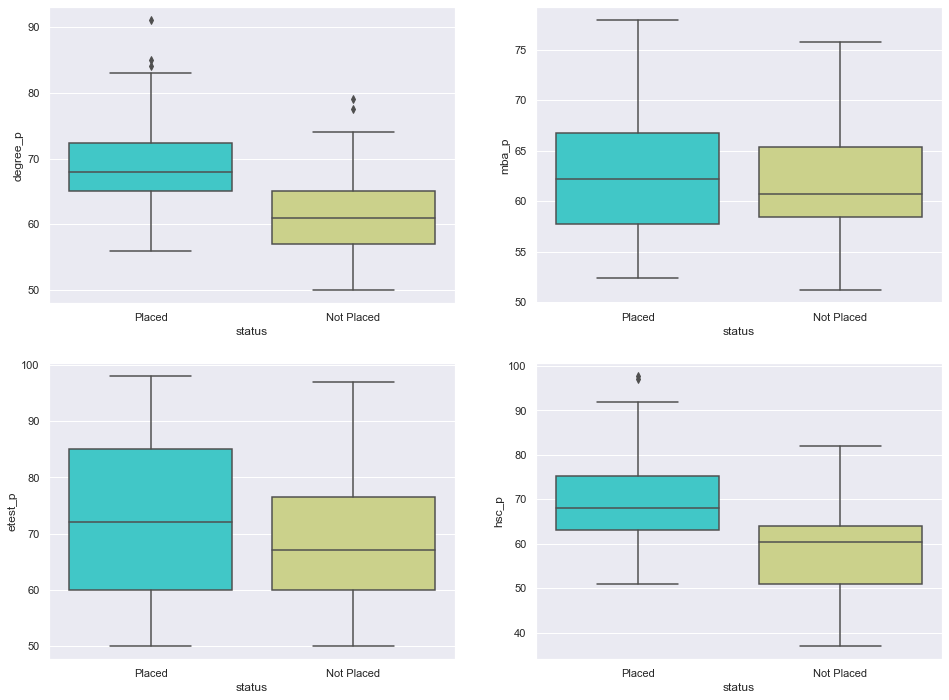

In [338]:
fig,axes = plt.subplots(2,2,figsize=(16,12))
sns.boxplot(x="status", y="degree_p", data=student_placement,palette='rainbow',ax=axes[0,0])
sns.boxplot(x="status", y="mba_p", data=student_placement,palette='rainbow',ax=axes[0,1])
sns.boxplot(x="status", y="etest_p", data=student_placement,palette='rainbow',ax=axes[1,0])
sns.boxplot(x="status", y="hsc_p", data=student_placement,palette='rainbow',ax=axes[1,1])

# Salary by specialisation 

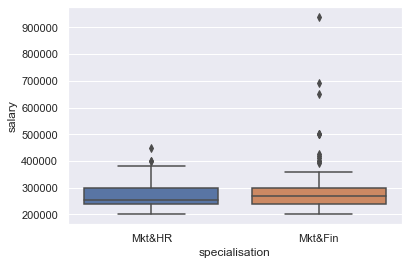

In [354]:
sns.boxplot(x="specialisation", y="salary", data=student_placement)

# Salary by Degree type 


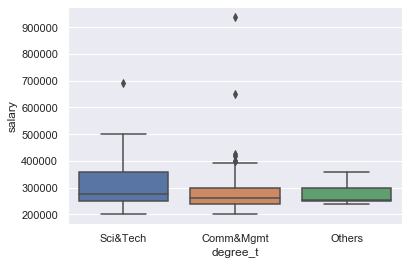

In [356]:
sns.boxplot(x="degree_t", y="salary", data=student_placement)

# Salary by Work Experience 

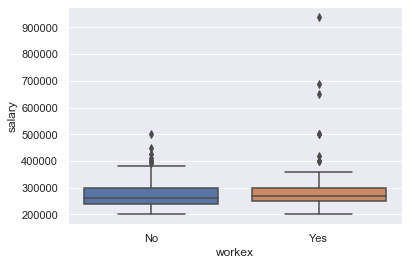

In [357]:
sns.boxplot(x="workex", y="salary", data=student_placement)